In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from numpy.linalg import norm
from numpy import (array, dot, arccos, clip)
import statistics
import math
from sklearn.svm import SVC
import joblib

In [63]:
def delcolumns(X):
    X = pd.DataFrame(X)
    for t in X.columns:
        if 'X' in t or 'Y' in t:
            continue
        else:
            X = X.drop([t],axis=1)
    X = np.array(X)
    for i in range(len(X)):
        for j in range(len(X[i])):
            if (round(X[i][j],5) == 0):
                X[i][j] = np.nan
    return X

def get_vector(X,Y):
    X = np.array(X)
    Y = np.array(Y)
    Z = X-Y
    Z = Z.tolist()
    return Z
def vector_joint(A):
    avlist= []
    for i in range(len(A)):
        vlist = []
        v1 = get_vector((A[i][12],A[i][13]),(A[i][10],A[i][11]))
        v2 = get_vector((A[i][12],A[i][13]),(A[i][14],A[i][15]))
        v3 = get_vector((A[i][6],A[i][7]),(A[i][4],A[i][5]))
        v4 = get_vector((A[i][6],A[i][7]),(A[i][8],A[i][9]))
        v5 = get_vector((A[i][26],A[i][27]),(A[i][24],A[i][25]))
        v6 = get_vector((A[i][26],A[i][27]),(A[i][28],A[i][29]))
        v7 = get_vector((A[i][20],A[i][21]),(A[i][18],A[i][19]))
        v8 = get_vector((A[i][20],A[i][21]),(A[i][22],A[i][23]))
        v9 = get_vector((A[i][10],A[i][11]),(A[i][2],A[i][3]))
        v10 = get_vector((A[i][4],A[i][5]),(A[i][2],A[i][3]))
        v11 = get_vector((A[i][24],A[i][25]),(A[i][16],A[i][17]))
        v12 = get_vector((A[i][18],A[i][19]),(A[i][16],A[i][17]))
        v13 = get_vector((A[i][2],A[i][3]),(A[i][0],A[i][1]))
        vlist.extend(v1+v2+v3+v4+v5+v6+v7+v8+v9+v10+v11+v12+v13)
        avlist.append(vlist)
    return avlist
def get_angle(X,Y,Z):
    u = Z - X
    v = Y - X
    if norm(u) == 0 or norm(v)==0:
        angle = 180
    else:
        cos = dot(u,v)/norm(u)/norm(v) # -> cosine of the angle
        angle = arccos(clip(cos, -1, 1)) # --> 라디안값으로 나옴
        angle = angle * (180/math.pi)
    return angle
def get_whole_angle(A):
    parr = np.array(A)
    alist = []
    for i in range(len(parr)):
        prealist = []
        la_a = get_angle(np.array([parr[i][12],parr[i][13]]),np.array([parr[i][10],parr[i][11]]),np.array([parr[i][14],parr[i][15]]))
        ra_a = get_angle(np.array([parr[i][6],parr[i][7]]),np.array([parr[i][4],parr[i][5]]),np.array([parr[i][8],parr[i][9]]))
        lk_a = get_angle(np.array([parr[i][26],parr[i][27]]),np.array([parr[i][24],parr[i][25]]),np.array([parr[i][28],parr[i][29]]))
        rk_a = get_angle(np.array([parr[i][20],parr[i][21]]),np.array([parr[i][18],parr[i][19]]),np.array([parr[i][22],parr[i][23]]))
        ls_a = get_angle(np.array([parr[i][10],parr[i][11]]),np.array([parr[i][12],parr[i][13]]),np.array([parr[i][2],parr[i][3]]))
        rs_a = get_angle(np.array([parr[i][4],parr[i][5]]),np.array([parr[i][6],parr[i][7]]),np.array([parr[i][2],parr[i][3]]))
        lh_a = get_angle(np.array([parr[i][24],parr[i][25]]),np.array([parr[i][26],parr[i][27]]),np.array([parr[i][16],parr[i][17]]))
        rh_a = get_angle(np.array([parr[i][18],parr[i][19]]),np.array([parr[i][20],parr[i][21]]),np.array([parr[i][16],parr[i][17]]))
        ln_a = get_angle(np.array([parr[i][2],parr[i][3]]),np.array([parr[i][10],parr[i][11]]),np.array([parr[i][0],parr[i][1]]))
        rn_a = get_angle(np.array([parr[i][2],parr[i][3]]),np.array([parr[i][4],parr[i][5]]),np.array([parr[i][0],parr[i][1]]))
        prealist = [la_a,ra_a,lk_a,rk_a,ls_a,rs_a,lh_a,rh_a,ln_a,rn_a]
             
        alist.append(prealist)
    return alist

def merge(X,Y):
    mergelist= []
    for i in range(len(X)):
        result = X[i]+Y[i]
        mergelist.append(result)
    merge_arr=np.array(mergelist)
    return merge_arr

from math import sqrt
def qmean(num):
	return sqrt(sum(n*n for n in num)/len(num))

def get_feature(X,Y):
    Xn = 0
    up_X = X
    up_Y = Y
    Xn = 0
    for i in range(0,13):
        if (np.isnan(X[i]) == True ) or (np.isnan(Y[i]) == True ):
            up_X = np.delete(up_X,i-Xn)
            up_Y = np.delete(up_Y,i-Xn)
            Xn = Xn+1
    Yn = 0
    for j in range(13,26):
        if (np.isnan(X[j]) == True ) or (np.isnan(Y[j]) == True ):
            up_X = np.delete(up_X,j-Yn-Xn)
            up_Y = np.delete(up_Y,j-Yn-Xn)
            Yn = Yn+1
    Zn = 0
    for k in range(26,36):
        if (np.isnan(X[k]) == True ) or (np.isnan(Y[k]) == True) :
            up_X = np.delete(up_X,k-Xn-Zn-Yn)
            up_Y = np.delete(up_Y,k-Xn-Zn-Yn)
            Zn = Zn+1

    Xx_vec = up_X[:13-Xn]
    Xy_vec = up_X[13-Xn:26-Xn-Yn]
    X_ang = up_X[26-Xn-Yn:]
    Yx_vec = up_Y[:13-Xn]
    Yy_vec = up_Y[13-Xn:26-Xn-Yn]
    Y_ang = up_Y[26-Xn-Yn:]
    #Xx_vec 노말라이즈
    Xx_max,Xx_min = max(Xx_vec),min(Xx_vec)
    Xx_term = Xx_max - Xx_min
    Xy_max,Xy_min = max(Xy_vec),min(Xy_vec)
    Xy_term = Xy_max - Xy_min
    for i in range(len(Xx_vec)):
        Xx_vec[i] = (Xx_vec[i] - Xx_min)/Xx_term
    for j in range(len(Xy_vec)):
        Xy_vec[j] = (Xy_vec[j] - Xy_min)/Xy_term
    Yx_max,Yx_min = max(Yx_vec),min(Yx_vec)
    Yx_term = Yx_max - Yx_min
    Yy_max,Yy_min = max(Yy_vec),min(Yy_vec)
    Yy_term = Yy_max - Yy_min
    for i in range(len(Yx_vec)):
        Yx_vec[i] = (Yx_vec[i] - Yx_min)/Yx_term
    for j in range(len(Yy_vec)):
        Yy_vec[j] = (Yy_vec[j] - Yy_min)/Yy_term
    
    ang_dis = X_ang-Y_ang
    X_dis = Xx_vec-Yx_vec
    Y_dis = Xy_vec-Yy_vec
    
    ang_std = statistics.stdev(ang_dis)
    ang_avg = statistics.mean(ang_dis)
    ang_rms = qmean(ang_dis)
    
    Xvec_std = statistics.stdev(X_dis)
    Xvec_avg = statistics.mean(X_dis)
    Xvec_rms = qmean(X_dis)
    
    Yvec_std = statistics.stdev(Y_dis)
    Yvec_avg = statistics.mean(Y_dis)
    Yvec_rms = qmean(Y_dis)
    
    flist = [Xvec_std,Xvec_avg,Xvec_rms,Yvec_std,Yvec_std,Yvec_rms,ang_std,ang_avg,ang_rms]
    return flist

def norm_vec(X):
    r_list = []
    for i in range(len(X)):
        x_list = []
        y_list = []
        tx_list = []
        ty_list = []
        for j in range(len(X[i])):
            x = X[i][j]
            if j %2 == 0:
                x_list.append(x)
            else:
                y_list.append(x)
        t = x_list + y_list
        r_list.append(t)
    return r_list

* 사용 함수들

In [3]:
def preprocessing(df):
    ddf = delcolumns(df)
    vector = vector_joint(ddf)
    norm_vector = norm_vec(vector)
    angle = get_whole_angle(ddf)
    result = merge(norm_vector,angle)

    return result

In [10]:
def make_label(arr1, arr2, x_lis, y_lis,label):
    for i in range(0, len(arr1)):
        features = get_feature(arr1[i],arr2[i])
        x_lis.append(features)
        y_lis.append(label)
    return x_lis, y_lis

In [9]:
def SVM(X_train, Y_train):
    from sklearn.svm import SVC
    svm = SVC(kernel='linear', C=1.0, random_state=42)

    svm.fit(X_train, Y_train)

    accuracy = svm.score(X_test, Y_test)

    print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))
    
    return svm

In [8]:
def RF(X_train, Y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import roc_auc_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier

    parameters = {'max_depth' : [3, 10, None]}

    random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=30, n_jobs=-1)

    grid_search = GridSearchCV(random_forest, parameters, n_jobs=-1, cv=10, scoring='roc_auc')

    grid_search.fit(X_train, Y_train)

    print(grid_search.best_params_)
    random_forest_best = grid_search.best_estimator_
    
    return random_forest_best

In [7]:
def LGBM(X_train, Y_train):
    from sklearn.model_selection import GridSearchCV
    from lightgbm import LGBMClassifier
    lgmb = LGBMClassifier(n_estimators=100)
    hyper_params = {'num_leaves': [32, 64],
           'max_depth': [128, 160],
           'min_child_samples': [60, 100],
           'subsample': [0.8, 1]}

    lgmv = GridSearchCV(lgmb, 
                             param_grid=hyper_params, 
                             verbose=1, 
                             n_jobs=-1, cv = 3)

    lgmv.fit(X_train, Y_train)

    lgmv.best_score_
    
    return lgmv

In [5]:
def model_evaluation(X_test, Y_test, filename):
    loaded_model1 = joblib.load(filename)
    prediction = loaded_model1.predict(X_test)
    prediction_prob = loaded_model1.predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(Y_test, prediction_prob)
    roc_auc = auc(Y_test, prediction_prob)
    print('ROC_AUC Score :', roc_auc_score(Y_test,prediction_prob))
    target_names = ['class0', 'class1']
    print(classification_report(Y_test, prediction, target_names=target_names))
    print("accuracy : {0:.5f}%".format(loaded_model1.score(X_test, Y_test)*100))
    print("precision : {0:.5f}%".format(precision_score(Y_test, prediction, pos_label=1)*100))
    print("recall : {0:.5f}%".format(recall_score(Y_test, prediction, pos_label=1)*100))
    print("f1 : {0:.5f}%".format(f1_score(Y_test, prediction, pos_label=1)*100))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc="lower right")

In [11]:
ang_1a = pd.DataFrame(l1a)
ang_1a.iloc[:,-11:-1].to_csv('./angle/ang_1a.csv',index=False)
ang_1b = pd.DataFrame(l1b)
ang_1b.iloc[:,-11:-1].to_csv('./angle/ang_1b.csv',index=False)
ang_0a = pd.DataFrame(l0a)
ang_0a.iloc[:,-11:-1].to_csv('./angle/ang_0a.csv',index=False)
ang_0b = pd.DataFrame(l0b)
ang_0b.iloc[:,-11:-1].to_csv('./angle/ang_0b.csv',index=False)

NameError: name 'l1a' is not defined

In [64]:
label_1_A = pd.read_csv('1129_22/train_1A_final.csv')
label_1_B = pd.read_csv('1129_22/train_1B_final.csv')
label_0_A = pd.read_csv('1129_22/train_0A_final.csv')
label_0_B = pd.read_csv('1129_22/train_0B_final.csv')

'''
test_0_A = pd.read_csv('1128/bingbingf(25)_test.csv')
test_0_B = pd.read_csv('1128/Bloom2(25)_test.csv')
test_1_A = pd.read_csv('1128/bingbingt(25).csv')
test_1_B = pd.read_csv('1128/bingbingf(25).csv')
'''

l1a = preprocessing(label_1_A)
l1b = preprocessing(label_1_B)
l0a = preprocessing(label_0_A)
l0b = preprocessing(label_0_B)

'''
t1a = preprocessing(test_1_A)
t1b = preprocessing(test_1_B)
t0a = preprocessing(test_0_A)
t0b = preprocessing(test_0_B)
'''
'''
X_train = []
Y_train = []

X_test = []
Y_test = []

X_train, Y_train = make_label(l1a[:196],l1b[:196],X_train, Y_train,1)
X_train, Y_train= make_label(l0a[:196],l0b[:196],X_train, Y_train,0)

X_test, Y_test= make_label(l1a[196:],l1b[196:],X_test, Y_test,1)
X_test, Y_test= make_label(l0a[196:],l0b[196:],X_test,Y_test,0)
'''

X_train1 = []
Y_train1 = []
X_train0 = []
Y_train0 = []


X_test0 = []
Y_test0 = []
X_test1 = []
Y_test1 = []

X_train1, Y_train1 = make_label(l1a[:196],l1b[:196],X_train1, Y_train1,1)
X_train0, Y_train0= make_label(l0a[:196],l0b[:196],X_train0, Y_train0,0)

X_test1, Y_test1= make_label(l1a[196:],l1b[196:],X_test1, Y_test1,1)
X_test0, Y_test0= make_label(l0a[196:],l0b[196:],X_test0,Y_test0,0)
#X_train, Y_train = make_label(l1a,l1b,X_train, Y_train,1)
#X_train, Y_train = make_label(l0a,l0b,X_train, Y_train,0)

#X_test, Y_test= make_label(t1a,t1b,X_test, Y_test,1)
#X_test, Y_test= make_label(t0a,t0b,X_test,Y_test,0)

In [65]:
import matplotlib.pyplot as plt
l1 = X_train1 + X_test1 
l0 = X_train0 + X_test0
l0 = l0[:261]
def got(X,n):
    target = []
    for i in range(len(X)):
        target.append(X[i][n])
    return target
x_std_1 = got(l1,0)
x_std_0 = got(l0,0)
x_avg_1 = got(l1,1)
x_avg_0 = got(l0,1)
x_qm_1 = got(l1,2)
x_qm_0 = got(l0,2)
y_std_1 = got(l1,3)
y_std_0 = got(l0,3)
y_qm_1 = got(l1,5)
y_qm_0 = got(l0,5)
y_avg_1 = got(l1,4)
y_avg_0 = got(l0,4)


<Figure size 640x480 with 1 Axes>

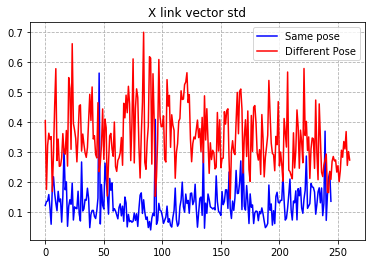

In [72]:
plt.plot(x_std_1,label='Same pose',color = 'b')
plt.plot(x_std_0,label='Different Pose',color = 'r')
plt.legend()
plt.grid(linestyle='dashed')
plt.title('X link vector std')
plt.show()

* SVM

In [61]:
svm = SVM(X_train,Y_train)
#joblib.dump(svm, 'SVM.sav')
#model_evaluation(X_test, Y_test,'SVM.sav')

from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print(classification_report(Y_test, y_pred_test))
print("accuracy : {0:.5f}%".format(svm.score(X_test, Y_test)*100))
print("precision : {0:.5f}%".format(precision_score(Y_test, y_pred_test, pos_label=1)*100))
print("recall : {0:.5f}%".format(recall_score(Y_test, y_pred_test, pos_label=1)*100))
print("f1 : {0:.5f}%".format(f1_score(Y_test, y_pred_test, pos_label=1)*100))

The accuracy on testing set is: 86.5%
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       114
           1       0.74      0.86      0.79        49

   micro avg       0.87      0.87      0.87       163
   macro avg       0.84      0.86      0.85       163
weighted avg       0.87      0.87      0.87       163

accuracy : 86.50307%
precision : 73.68421%
recall : 85.71429%
f1 : 79.24528%


* Random Forest

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': None}
ROC_AUC Score : 0.8863862618218018
              precision    recall  f1-score   support

      class0       0.91      0.91      0.91        82
      class1       0.86      0.86      0.86        49

   micro avg       0.89      0.89      0.89       131
   macro avg       0.89      0.89      0.89       131
weighted avg       0.89      0.89      0.89       131

accuracy : 89.31298%
precision : 85.71429%
recall : 85.71429%
f1 : 85.71429%


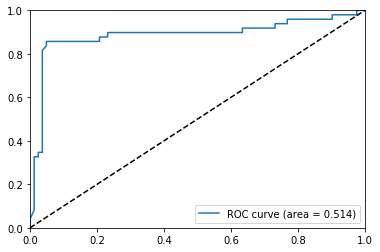

In [511]:
rf = RF(X_train,Y_train)
joblib.dump(rf, 'RF.sav')
model_evaluation(X_test, Y_test, 'RF.sav')

* LightGBM

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


ROC_AUC Score : 0.9150074664011946
              precision    recall  f1-score   support

      class0       0.91      0.91      0.91        82
      class1       0.86      0.86      0.86        49

   micro avg       0.89      0.89      0.89       131
   macro avg       0.89      0.89      0.89       131
weighted avg       0.89      0.89      0.89       131

accuracy : 89.31298%
precision : 85.71429%
recall : 85.71429%
f1 : 85.71429%


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.3s finished


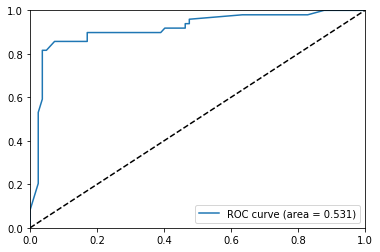

In [512]:
lgbm = LGBM(X_train,Y_train)
joblib.dump(lgbm, 'LGBM.sav')
model_evaluation(X_test, Y_test, 'LGBM.sav')